<a href="https://colab.research.google.com/github/Andres-boullosa/AA_PRACTICA1_GRUPO_2/blob/main/AA_PRACTICA1_GRUPO_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* GRUPO 2
* Andrés Boullosa García
* Cristina Velasco Almirall

# 0. Introducción


Esta práctica consiste en crear un modelo de Red de Neuronas Artificiales que sea capaz de reconocer y clasificar imágenes de ropa.

Las imágenes que utilizaremos provienen del conjunto de datos Fashion-MNIST, que contiene datos de las imágenes de Zalando, una página web de moda online alemana. Contiene 70000 imágenes de baja calidad (28x28 píxeles) en escala de grises en 10 categorías, de las cuales 60000 serán imágenes de entrenamiento y 10000 serán imágenes de test.

A lo largo de este documento, definiremos, configuraremos, entrenaremos, evaluaremos y mejoraremos varios modelos que posteriormente utilizaremos para hacer predicciones. 

## Preparaciones necesarias


### Librerías

Importamos las librerías que vamos a requerir: TensorFlow y keras. 
Nos aseguramos de que la versión de TensorFlow sea 2.0.0 o superior. 
También comprobamos la versión de keras, así como si disponemos de GPU.
Como podemos ver, tenemos la versión 2.6.0 tanto de keras como de Tensor Flow, y la GPU está disponible.

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras

# Comprobamos versiones de TF, keras, y si disponemos de GPU
print(tf.keras.__version__)
print(tf.__version__)
print("GPU Available:", tf.config.list_physical_devices('GPU'))

2.6.0
2.6.0
GPU Available: []


### Carga y preparación de los datos

Descargamos los datos: un dataset que obtenemos de keras llamado fashion_mnist. Como sabemos, es un conjunto de imágenes de ropa de la marca Zalando. Además de imágenes, este dataset contiene lo que llamamos "labels". Es decir, cada imagen lleva asociada una etiqueta que dice qué es esa imagen (un pantalón, una camiseta...). 
Descargamos imágenes y labels tanto de entrenamiento como de test.

In [ ]:
from keras.datasets import fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


Para ver la forma de los datos, utilizamos la función *shape*. Observamos que tenemos 60000 imagenes de entrenamiento y 10000 de test, todas ellas de 28x28 píxeles.

In [ ]:
# Vemos la forma de los datos
print(train_images.shape)
print(test_images.shape)

(60000, 28, 28)
(10000, 28, 28)


Transformamos los datos a tensores para que se puedan usar como entrada de nuestros futuros modelos. 

In [ ]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

In [ ]:
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

Preparamos las etiquetas para entrenar el modelo. Pasan de ser un número a un vector de ceros con un 1 en la posición correspondiente.

In [ ]:
# Importamos la función to_categorical
from keras.utils.np_utils import to_categorical

# Transformamos las etiquetas: de ser un solo numero pasan a ser un array con un 
# 1 en la posicion correspondiente
# Se imprimen antes y después para evidenciar el cambio
print(train_labels[30000])
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
print(train_labels[30000])

3
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


Después de haber estudiado la función *Flatten* la consideramos innecesaria y no la utilizaremos para los modelos.

# 1. Construimos y entrenamos los modelos pedidos


In [ ]:
# Importamos las librerías necesarias
from keras import models
from keras import layers

Construimos y entrenamos los modelos para ver cuál es mejor, y por lo tanto, cuál deberíamos usar. En total son 8, con dos variaciones (la network2_2 y la network7_2).


In [ ]:
# Construimos el modelo
network1 = models.Sequential()
network1.add(layers.Dense(10, activation='relu', input_shape=(28*28,)))
network1.add(layers.Dense(10, activation='softmax'))

# Compilamos el modelo: utilizamos el optimizador RMSProp y la función de 
# pérdida categorical_crossentropy.
network1.compile(optimizer='rmsprop', 
                loss='categorical_crossentropy',
                metrics=['accuracy'])

# Entrenamos el modelo
network1.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 2s 2ms/step - loss: 0.7753 - accuracy: 0.7425
Epoch 2/5
469/469 [==============================] - 1s 2ms/step - loss: 0.5160 - accuracy: 0.8235
Epoch 3/5
469/469 [==============================] - 1s 2ms/step - loss: 0.4707 - accuracy: 0.8393
Epoch 4/5
469/469 [==============================] - 1s 2ms/step - loss: 0.4447 - accuracy: 0.8475
Epoch 5/5
469/469 [==============================] - 1s 2ms/step - loss: 0.4289 - accuracy: 0.8513


In [ ]:
# Hacemos lo mismo para la network2

network2 = models.Sequential()
network2.add(layers.Dense(10, activation='relu', input_shape=(28*28,)))
network2.add(layers.Dense(10, activation='softmax'))

network2.compile(optimizer='rmsprop', 
                loss='categorical_crossentropy',
                metrics=['accuracy'])

network2.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 1s 2ms/step - loss: 0.8210 - accuracy: 0.7293
Epoch 2/5
469/469 [==============================] - 1s 2ms/step - loss: 0.5141 - accuracy: 0.8281
Epoch 3/5
469/469 [==============================] - 1s 2ms/step - loss: 0.4677 - accuracy: 0.8403
Epoch 4/5
469/469 [==============================] - 1s 2ms/step - loss: 0.4445 - accuracy: 0.8462
Epoch 5/5
469/469 [==============================] - 1s 2ms/step - loss: 0.4307 - accuracy: 0.8511


In [ ]:
# Hacemos la segunda versión de la network2_2

network2_2 = models.Sequential()
network2_2.add(layers.Dense(10, activation='relu', input_shape=(28*28,)))
network2_2.add(layers.Dense(10, activation='softmax'))

network2_2.compile(optimizer='rmsprop', 
                loss='categorical_crossentropy',
                metrics=['accuracy'])

network2_2.fit(train_images, train_labels, epochs=25, batch_size=128)

Epoch 1/25
469/469 [==============================] - 1s 2ms/step - loss: 0.9296 - accuracy: 0.6819
Epoch 2/25
469/469 [==============================] - 1s 2ms/step - loss: 0.5457 - accuracy: 0.8180
Epoch 3/25
469/469 [==============================] - 1s 2ms/step - loss: 0.4929 - accuracy: 0.8333
Epoch 4/25
469/469 [==============================] - 1s 2ms/step - loss: 0.4666 - accuracy: 0.8404
Epoch 5/25
469/469 [==============================] - 1s 2ms/step - loss: 0.4506 - accuracy: 0.8464
Epoch 6/25
469/469 [==============================] - 1s 2ms/step - loss: 0.4399 - accuracy: 0.8491
Epoch 7/25
469/469 [==============================] - 1s 2ms/step - loss: 0.4311 - accuracy: 0.8513
Epoch 8/25
469/469 [==============================] - 1s 2ms/step - loss: 0.4253 - accuracy: 0.8539
Epoch 9/25
469/469 [==============================] - 1s 2ms/step - loss: 0.4192 - accuracy: 0.8559
Epoch 10/25
469/469 [==============================] - 1s 2ms/step - loss: 0.4150 - accuracy: 0.8563

In [ ]:
# Hacemos lo mismo para la network3

network3 = models.Sequential()
network3.add(layers.Dense(10, activation='sigmoid', input_shape=(28*28,)))
network3.add(layers.Dense(10, activation='softmax'))

network3.compile(optimizer='sgd', 
                loss='categorical_crossentropy',
                metrics=['accuracy'])

network3.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 1s 2ms/step - loss: 2.1237 - accuracy: 0.2798
Epoch 2/5
469/469 [==============================] - 1s 2ms/step - loss: 1.8493 - accuracy: 0.4203
Epoch 3/5
469/469 [==============================] - 1s 2ms/step - loss: 1.6421 - accuracy: 0.5338
Epoch 4/5
469/469 [==============================] - 1s 2ms/step - loss: 1.4727 - accuracy: 0.6437
Epoch 5/5
469/469 [==============================] - 1s 2ms/step - loss: 1.3366 - accuracy: 0.6722


In [ ]:
# Hacemos lo mismo para la network4

network4 = models.Sequential()
network4.add(layers.Dense(10, activation='sigmoid', input_shape=(28*28,)))
network4.add(layers.Dense(10, activation='softmax'))

network4.compile(optimizer='rmsprop', 
                loss='categorical_crossentropy',
                metrics=['accuracy'])

network4.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 2s 2ms/step - loss: 1.4310 - accuracy: 0.6278
Epoch 2/5
469/469 [==============================] - 1s 2ms/step - loss: 0.8507 - accuracy: 0.7838
Epoch 3/5
469/469 [==============================] - 1s 2ms/step - loss: 0.6330 - accuracy: 0.8108
Epoch 4/5
469/469 [==============================] - 1s 2ms/step - loss: 0.5442 - accuracy: 0.8267
Epoch 5/5
469/469 [==============================] - 1s 2ms/step - loss: 0.4977 - accuracy: 0.8358


In [ ]:
# Hacemos lo mismo para la network5

network5 = models.Sequential()
network5.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
network5.add(layers.Dense(10, activation='softmax'))

network5.compile(optimizer='sgd', 
                loss='categorical_crossentropy',
                metrics=['accuracy'])

network5.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 4s 8ms/step - loss: 1.0243 - accuracy: 0.6895
Epoch 2/5
469/469 [==============================] - 4s 8ms/step - loss: 0.6628 - accuracy: 0.7898
Epoch 3/5
469/469 [==============================] - 4s 8ms/step - loss: 0.5827 - accuracy: 0.8117
Epoch 4/5
469/469 [==============================] - 4s 8ms/step - loss: 0.5403 - accuracy: 0.8223
Epoch 5/5
469/469 [==============================] - 4s 8ms/step - loss: 0.5133 - accuracy: 0.8291


In [ ]:
# Hacemos lo mismo para la network6

network6 = models.Sequential()
network6.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
network6.add(layers.Dense(10, activation='softmax'))

network6.compile(optimizer='rmsprop', 
                loss='categorical_crossentropy',
                metrics=['accuracy'])

network6.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 5s 10ms/step - loss: 0.5540 - accuracy: 0.8019
Epoch 2/5
469/469 [==============================] - 5s 10ms/step - loss: 0.3781 - accuracy: 0.8616
Epoch 3/5
469/469 [==============================] - 5s 10ms/step - loss: 0.3359 - accuracy: 0.8770
Epoch 4/5
469/469 [==============================] - 5s 10ms/step - loss: 0.3100 - accuracy: 0.8845
Epoch 5/5
469/469 [==============================] - 5s 10ms/step - loss: 0.2919 - accuracy: 0.8930


In [ ]:
# Hacemos lo mismo para la network7

network7 = models.Sequential()
network7.add(layers.Dense(512, activation='sigmoid', input_shape=(28*28,)))
network7.add(layers.Dense(10, activation='softmax'))

network7.compile(optimizer='sgd', 
                loss='categorical_crossentropy',
                metrics=['accuracy'])

network7.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 4s 8ms/step - loss: 1.7181 - accuracy: 0.5742
Epoch 2/5
469/469 [==============================] - 4s 8ms/step - loss: 1.1389 - accuracy: 0.7078
Epoch 3/5
469/469 [==============================] - 4s 8ms/step - loss: 0.9285 - accuracy: 0.7300
Epoch 4/5
469/469 [==============================] - 4s 8ms/step - loss: 0.8243 - accuracy: 0.7433
Epoch 5/5
469/469 [==============================] - 4s 8ms/step - loss: 0.7619 - accuracy: 0.7528


In [ ]:
# Hacemos la segunda version de la network7_2

network7_2 = models.Sequential()
network7_2.add(layers.Dense(512, activation='sigmoid', input_shape=(28*28,)))
network7_2.add(layers.Dense(10, activation='softmax'))

network7_2.compile(optimizer='sgd', 
                loss='categorical_crossentropy',
                metrics=['accuracy'])

network7_2.fit(train_images, train_labels, epochs=25, batch_size=128)

Epoch 1/25
469/469 [==============================] - 4s 8ms/step - loss: 1.7199 - accuracy: 0.5773
Epoch 2/25
469/469 [==============================] - 4s 7ms/step - loss: 1.1330 - accuracy: 0.7083
Epoch 3/25
469/469 [==============================] - 4s 8ms/step - loss: 0.9260 - accuracy: 0.7288
Epoch 4/25
469/469 [==============================] - 4s 7ms/step - loss: 0.8243 - accuracy: 0.7407
Epoch 5/25
469/469 [==============================] - 4s 8ms/step - loss: 0.7630 - accuracy: 0.7509
Epoch 6/25
469/469 [==============================] - 4s 8ms/step - loss: 0.7211 - accuracy: 0.7592
Epoch 7/25
469/469 [==============================] - 4s 8ms/step - loss: 0.6900 - accuracy: 0.7664
Epoch 8/25
469/469 [==============================] - 4s 7ms/step - loss: 0.6658 - accuracy: 0.7717
Epoch 9/25
469/469 [==============================] - 4s 8ms/step - loss: 0.6454 - accuracy: 0.7772
Epoch 10/25
469/469 [==============================] - 4s 7ms/step - loss: 0.6286 - accuracy: 0.7832

In [ ]:
# Hacemos lo mismo para la network8

network8 = models.Sequential()
network8.add(layers.Dense(512, activation='sigmoid', input_shape=(28*28,)))
network8.add(layers.Dense(10, activation='softmax'))
network8.summary()

network8.compile(optimizer='rmsprop', 
                loss='categorical_crossentropy',
                metrics=['accuracy'])

network8.fit(train_images, train_labels, epochs=5, batch_size=128)

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_19 (Dense)             (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
469/469 [==============================] - 5s 10ms/step - loss: 0.5851 - accuracy: 0.7958
Epoch 2/5
469/469 [==============================] - 5s 10ms/step - loss: 0.4271 - accuracy: 0.8452
Epoch 3/5
469/469 [==============================] - 5s 10ms/step - loss: 0.3860 - accuracy: 0.8599
Epoch 4/5
469/469 [==============================] - 5s 10ms/step - loss: 0.3601 - accuracy: 0.8686
Epoch 5/5
469/469 [==============================] - 5s 10ms/step - loss: 0.3389 - accuracy: 0.8747


Vemos que todos los modelos tienen 5 épocas (*epoch*), a excepción de la network2_2 y la network7_2, que tienen 25.

En cada época, los modelos tienen una pérdida (*loss*) y una precisión (*accuracy*). En todos ellos, a medida que aumenta el número de épocas, va aumentando la precisión y disminuyendo la pérdida, ya que estamos entrenándolos.

# 2. Explicamos la salida de la llamada a summary


Utilizamos la función *summary* para tener un resumen de cada uno de nuestros modelos. El resumen incluye la siguiente información:


1.   Las capas (*layer*) y su orden en el modelo.
2.   La forma del output (*output shape*) y su orden en el modelo.
3.   El número de parámetros (*param*, los pesos que tiene) en cada capa. 
4.   El número total de parámetros (*total params*) en el modelo.


In [ ]:
print("Modelo 1:")
network1.summary()

print("Modelo 2:")
network2.summary()

print("Modelo 3:")
network3.summary()

print("Modelo 4:")
network4.summary()

print("Modelo 5:")
network5.summary()

print("Modelo 6:")
network6.summary()

print("Modelo 7:")
network7.summary()

print("Modelo 8:")
network8.summary()

Modelo 1:
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                7850      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________
Modelo 2:
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                110       
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________
Modelo 3:


Para nuestro caso concreto, tenemos:


1.   Cada modelo tiene dos capas.
2.   La salida de las capas es *(None, 10)* o *(None, 512)*, lo que se corresponde con el número de neuronas de la capa concreta. 
3.   Observamos que en la capa 1 de los primeros 5 modelos, *param* es 7850. Este número sale de: 28x28 = 784x10 = 7840+10 = 7850. 
En los modelos 5, 6, 7 y 8, la primera capa tiene 401920 = 28x28x512 = 401408+512. 
Los valores de la segunda capa vienen de 10x10 + 10 y de 512x10 + 10.

4.  El número de parámetros total de los modelos 1, 2, 3, 4 y 5 es 7850+110 = 7960.
En el resto de modelos, el número de parámetros total es 407,050 = 401920+5130.
El 100% de los parámetros totales son entrenables.




# 3. Análisis concreto de los modelos 2 y 7 frente a sus variantes


Evaluamos los modelos a analizar sobre los datos de test.

In [ ]:
# Probamos el modelo 2
print("Modelo 2:")
network2.evaluate(test_images, test_labels)

# Probamos el modelo 2_2
print("Modelo 2_2:")
network2_2.evaluate(test_images, test_labels)


Modelo 2:
313/313 [==============================] - 1s 1ms/step - loss: 0.4665 - accuracy: 0.8390
Modelo 2_2:
313/313 [==============================] - 1s 1ms/step - loss: 0.4351 - accuracy: 0.8453


[0.43514129519462585, 0.845300018787384]

En el caso del modelo 2, podemos ver que la pérdida (*loss*) es 99.5446 y la precisión (*accuracy*) es 0.5136. Sin embargo, en el modelo 2_2, la pérdida es 185.4996 y la precisión es 0.5908. 

La precisión del modelo 2_2 es ligeramente más alta que la del modelo 2, y la pérdida del modelo 2 es mucho más baja que la del modelo 2_2. En ambos modelos podemos observar que los resultados son mucho peores que con los datos de entrenamiento, como se espera ya que se está enfrentando con imágenes nuevas. 

In [ ]:
# Probamos el modelo 7
print("Modelo 7:")
network7.evaluate(test_images, test_labels)

# Probamos el modelo 7_2
print("Modelo 7_2:")
network7_2.evaluate(test_images, test_labels)

Modelo 7:
313/313 [==============================] - 1s 3ms/step - loss: 0.7535 - accuracy: 0.7438
Modelo 7_2:
313/313 [==============================] - 1s 3ms/step - loss: 0.5328 - accuracy: 0.8127


[0.5328317284584045, 0.8126999735832214]

Por otro lado, en el caso del modelo 7 frente al modelo 7_2, podemos ver que la pérdida (*loss*) del modelo 7 es 2.2887 y la precisión (*accuracy*) es 0.1877. Mientras que en el modelo 7_2, la pérdida es 2.1461 y la precisión es 0.1151. 
Vemos que ambos modelos son muy similares.

En este caso, los modelos se comportan un poco mejor que con los datos de entrenamiento.

# 4. Evaluación de todos los modelos frente a los datos de prueba

Prueba de todos los modelos.

In [ ]:

# Probamos el modelo 1
print("Modelo 1:")
network1.evaluate(test_images, test_labels)

# Probamos el modelo 2
print("Modelo 2:")
network2.evaluate(test_images, test_labels)

# Probamos el modelo 2_2
print("Modelo 2_2:")
network2_2.evaluate(test_images, test_labels)

# Probamos el modelo 3
print("Modelo 3:")
network3.evaluate(test_images, test_labels)

# Probamos el modelo 4
print("Modelo 4:")
network4.evaluate(test_images, test_labels)

# Probamos el modelo 5
print("Modelo 5:")
network5.evaluate(test_images, test_labels)

# Probamos el modelo 6
print("Modelo 6:")
network6.evaluate(test_images, test_labels)

# Probamos el modelo 7
print("Modelo 7:")
network7.evaluate(test_images, test_labels)

# Probamos el modelo 7_2
print("Modelo 7_2:")
network7_2.evaluate(test_images, test_labels)

# Probamos el modelo 8
print("Modelo 8:")
network8.evaluate(test_images, test_labels)

Modelo 1:
313/313 [==============================] - 1s 1ms/step - loss: 0.4728 - accuracy: 0.8356
Modelo 2:
313/313 [==============================] - 0s 1ms/step - loss: 0.4665 - accuracy: 0.8390
Modelo 2_2:
313/313 [==============================] - 0s 1ms/step - loss: 0.4351 - accuracy: 0.8453
Modelo 3:
313/313 [==============================] - 0s 1ms/step - loss: 1.2865 - accuracy: 0.6720
Modelo 4:
313/313 [==============================] - 1s 1ms/step - loss: 0.5072 - accuracy: 0.8292
Modelo 5:
313/313 [==============================] - 1s 3ms/step - loss: 0.5264 - accuracy: 0.8231
Modelo 6:
313/313 [==============================] - 1s 3ms/step - loss: 0.3737 - accuracy: 0.8619
Modelo 7:
313/313 [==============================] - 1s 3ms/step - loss: 0.7535 - accuracy: 0.7438
Modelo 7_2:
313/313 [==============================] - 1s 3ms/step - loss: 0.5328 - accuracy: 0.8127
Modelo 8:
313/313 [==============================] - 1s 3ms/step - loss: 0.4009 - accuracy: 0.8509


[0.4009173810482025, 0.8508999943733215]

Al evaluar nuestros modelos con las imágenes de test en vez de con las de entrenamiento, podemos observar que la precisión (*accuracy*) baja y la pérdida (*loss*) sube. Esto es debido a que es la primera vez que nuestros modelos se enfrentan a las imágenes de test y no han sido entrenados con ellas.

Por ejemplo, vemos que la precisión del modelo 2_2 con las imágenes de test es 0.5908, mientras que con las de entrenamiento es 0.7984. Es un claro ejemplo de que el modelo ha sido sobreentrenado.

Sin embargo, vemos que en el modelo 8, la precisión con las imágenes de test es 0.6386, y con las imágenes de entrenamiento es 0.7265. Tanto la precisión como la pérdida no varían demasiado, por lo tanto no hay mucho sobreentrenamiento.

No hemos observado ningún comportamiento particular o extraño.

# 5. Predecimos la 6ª imagen de el conjunto de test para todos los modelos



Predecimos y imprimimos la 6ª imagen para todos los modelos.

In [ ]:
# Importamos numpy para poder usar argmax
import numpy as np

# Predicción network1
predictions1 = network1.predict(test_images)
print("Prediccion1:",np.argmax(predictions1[5]))

# Predicción network2
predictions2 = network2.predict(test_images)
print("Prediccion2:",np.argmax(predictions2[5]))

# Predicción network2_2
predictions2_2 = network2_2.predict(test_images)
print("Prediccion2_2:",np.argmax(predictions2_2[5]))

# Predicción network3
predictions3 = network3.predict(test_images)
print("Prediccion3:",np.argmax(predictions3[5]))

# Predicción network4
predictions4 = network4.predict(test_images)
print("Prediccion4:",np.argmax(predictions4[5]))

# Predicción network5
predictions5 = network5.predict(test_images)
print("Prediccion5:",np.argmax(predictions5[5]))

# Predicción network6
predictions6 = network6.predict(test_images)
print("Prediccion6:",np.argmax(predictions6[5]))

# Predicción network7
predictions7 = network7.predict(test_images)
print("Prediccion7:",np.argmax(predictions7[5]))

# Predicción network7_2
predictions7_2 = network7_2.predict(test_images)
print("Prediccion7_2:",np.argmax(predictions7_2[5]))

# Predicción network8
predictions8 = network8.predict(test_images)
print("Prediccion8:",np.argmax(predictions8[5]))

# valor real
print("Valor real:",np.argmax(test_labels[5]))

Prediccion1: 1
Prediccion2: 1
Prediccion2_2: 1
Prediccion3: 1
Prediccion4: 1
Prediccion5: 1
Prediccion6: 1
Prediccion7: 1
Prediccion7_2: 1
Prediccion8: 1
Valor real: 1


Podemos observar que al predecir la respuesta de todos nuestros modelos al evaluarlos con la imagen número 6 de test, todos acertarían. 



# 6. Graficamos las 10 primeras imágenes de cada conjunto de test


Creamos un vector llamado *class_names* con los nombres de cada clase, es decir, los nombres de las categorías en las que podemos clasificar las prendas de las imágenes.


In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Funciones necesarias para graficación


In [ ]:
import matplotlib.pyplot as plt

def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
  
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

 ## Graficación del comportamiento de los modelos
 

Modelo 1


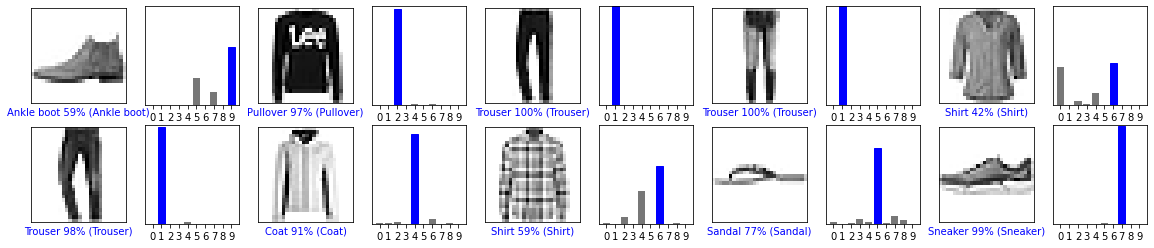

Modelo 2


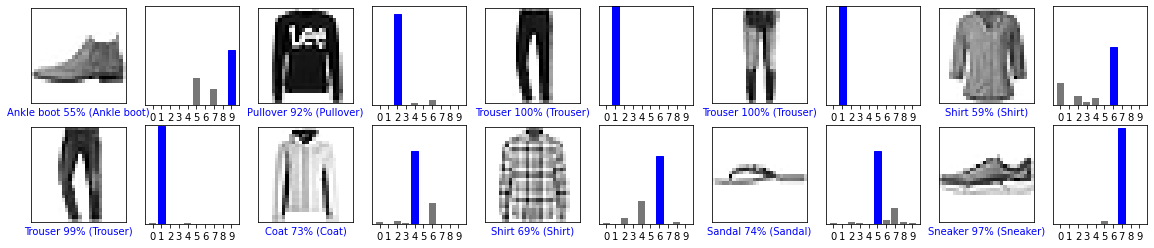

Modelo 2_2


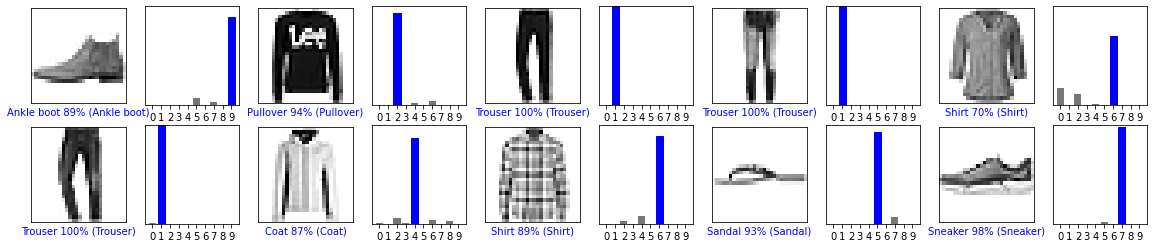

Modelo 3


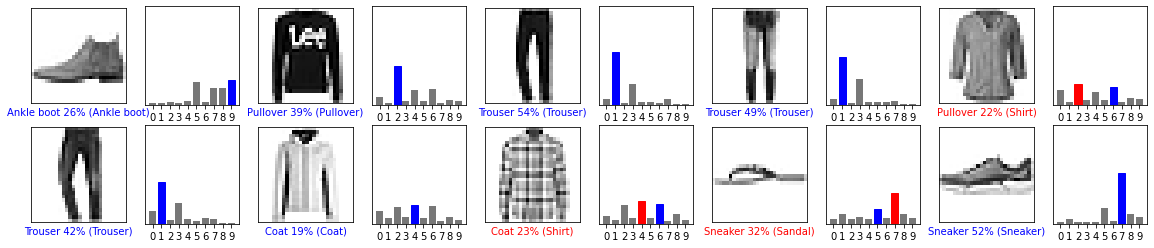

Modelo 4


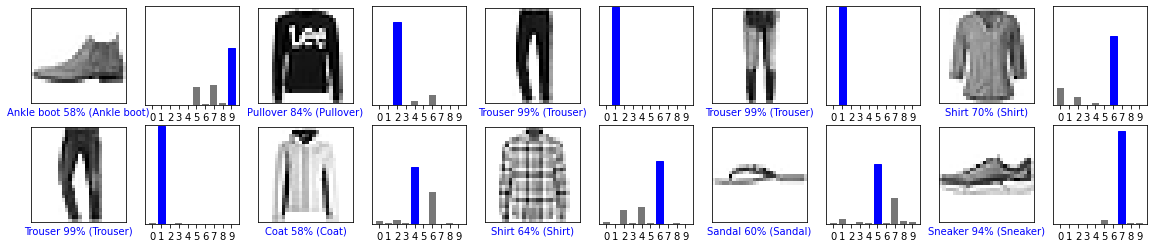

Modelo 5


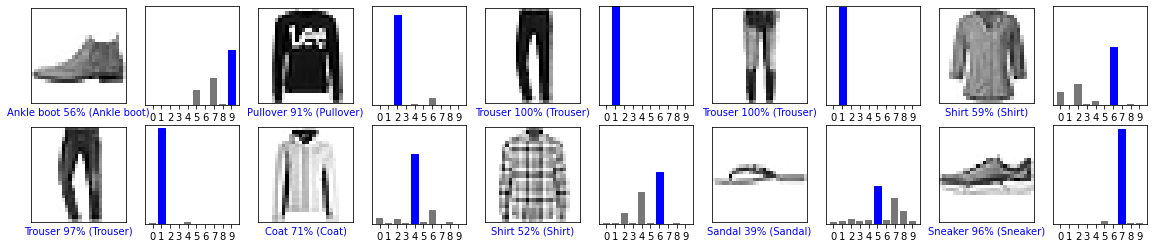

Modelo 6


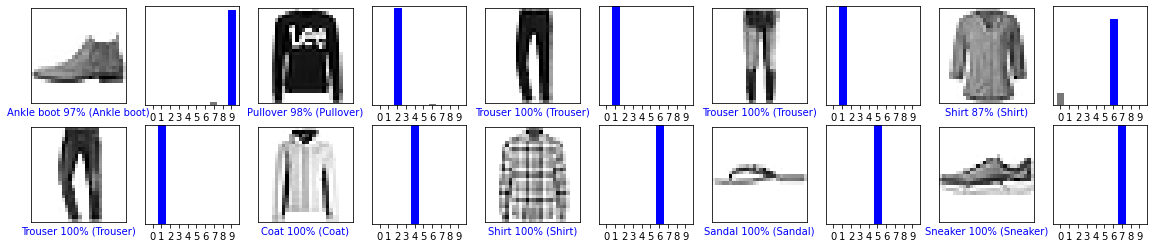

Modelo 7


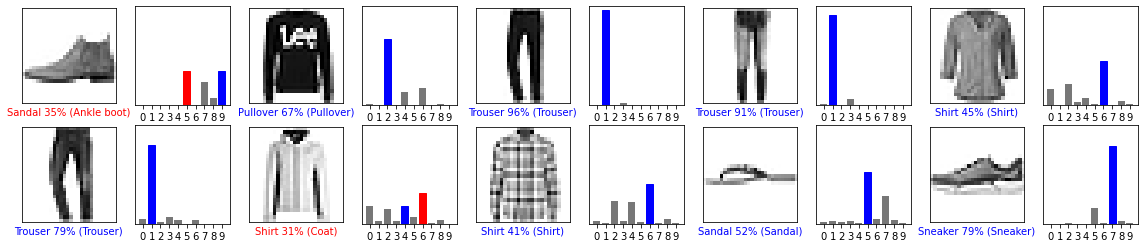

Modelo 7_2


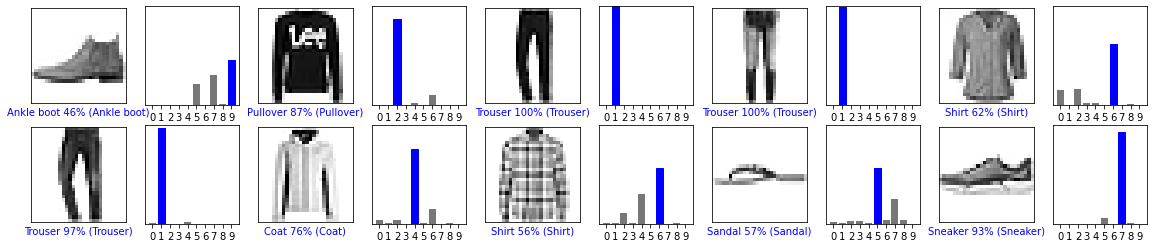

Modelo 8


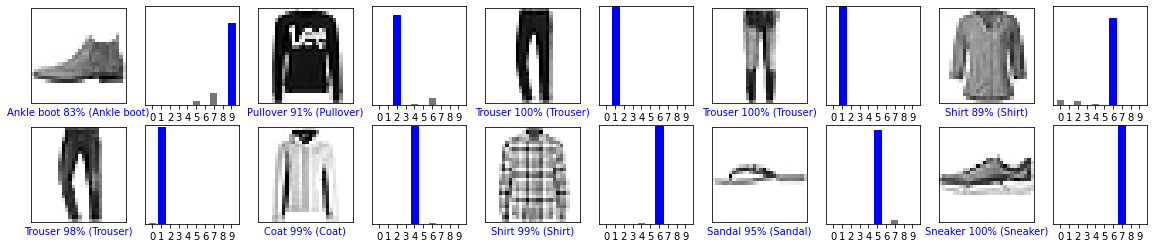

In [ ]:
# Iniciamos el tamaño de la matriz para imprimir
num_rows = 2
num_cols = 5
num_images = num_rows*num_cols

# Cambiamos los datos para que tengan la forma necesaria
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

# Graficamos el comportamiento del modelo 1
print("Modelo 1")
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions1, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions1, test_labels)
plt.show()

# Graficamos el comportamiento del modelo 2
print("Modelo 2")
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions2, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions2, test_labels)
plt.show()

# Graficamos el comportamiento del modelo 2_2
print("Modelo 2_2")
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions2_2, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions2_2, test_labels)
plt.show()

# Graficamos el comportamiento del modelo 3
print("Modelo 3")
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions3, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions3, test_labels)
plt.show()

# Graficamos el comportamiento del modelo 4
print("Modelo 4")
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions4, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions4, test_labels)
plt.show()

# Graficamos el comportamiento del modelo 5
print("Modelo 5")
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions5, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions5, test_labels)
plt.show()

# Graficamos el comportamiento del modelo 6
print("Modelo 6")
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions6, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions6, test_labels)
plt.show()

# Graficamos el comportamiento del modelo 7
print("Modelo 7")
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions7, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions7, test_labels)
plt.show()

# Graficamos el comportamiento del modelo 7_2
print("Modelo 7_2")
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions7_2, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions7_2, test_labels)
plt.show()

# Graficamos el comportamiento del modelo 8
print("Modelo 8")
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions8, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions8, test_labels)
plt.show()

Tras analizar el comportamiento de los modelos, llegamos a las siguientes conclusiones:


1.   Por lo general, los modelos se comportan de manera correcta en las imágenes seleccionadas.
2.   Los modelos distinguen correctamente entre elementos diferentes como pantalones (trouser) y zapatos.
3.   Los modelos tienen más problemas para distinguir prendas similares, como entre jerseis (pullover), camisas (shirt) y abrigos (coat) o zapatillas (sneakers) y botas de tobillo (ankle boots), ya que también se parecen entre ellas. 



# 7. Mejora del modelo


In [ ]:
# Volvemos a cargar y transformar los datos para que tengan la forma necesaria para el entrenamiento
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

# Construimos el modelo
network9 = models.Sequential()
network9.add(layers.Dense(128, activation='relu', input_shape=(28*28,)))
network9.add(layers.Dense(10, activation='softmax'))
network9.summary()

# Compilamos el modelo
network9.compile(optimizer='adam', 
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])



Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_20 (Dense)             (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


En la compilación del modelo, usamos dos elementos de importancia ayudan a mejorar el modelo:


1.   El optimizador *adam*:

*Adam* es un algoritmo de optimización que sustituye al clásico algoritmo de descenso del gradiente. Sirve para entrenar modelos de deep learning.

Combina las propiedades de *AdaGrad* (mejora el rendimiento en problemas con gradientes dispersos) y *RMSProp* (el que utilizábamos anteriormente, que funciona bien en problemas no-estacionarios). Esto hace que *adam* pueda manejar gradientes dispersos y problemas de ruido.

Es relativamente fácil de configurar, ya que los parámetros de la configuración predeterminada funcionan bien en la mayoría de los problemas.


2.   La función de pérdida *sparse_categorical_crossentropy*:

Una función de pérdida (*loss function*) es una función que evalúa la desviación entre las predicciones realizadas por la red neuronal y los valores reales de las observaciones utilizadas durante el aprendizaje. Cuanto menor es el resultado de esta función, más eficiente es la red neuronal.

Anteriormente, hemos utilizado *categorical_crossentropy* como función de pérdida. Sin embargo, el uso de *sparse_categorical_crossentropy*, nos permite no tener que transformar los datos (mediante *to_categorical*), y aun así beneficiarnos de la pérdida de la función crossentropy. 

Esto es algo positivo ya que en ocasiones, los datos a tranformar son demasiado grandes para utilizar *to_categorical*, y *sparse_categorical_crossentropy* no necesita que los datos estén en formato categórico, pueden ser números enteros. 



In [ ]:
# Entrenamos el modelo
network9.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 2s 4ms/step - loss: 0.5555 - accuracy: 0.8073
Epoch 2/5
469/469 [==============================] - 2s 4ms/step - loss: 0.4025 - accuracy: 0.8575
Epoch 3/5
469/469 [==============================] - 2s 4ms/step - loss: 0.3605 - accuracy: 0.8719
Epoch 4/5
469/469 [==============================] - 2s 4ms/step - loss: 0.3378 - accuracy: 0.8787
Epoch 5/5
313/313 [==============================] - 1s 1ms/step - loss: 0.3686 - accuracy: 0.8637


La precisión (*accuracy*) final tras las el entrenamiento es de 0.88, y la pérdida (*loss*) es de 0.31.

In [ ]:
# Testeamos el modelo
test_loss, test_acc = network9.evaluate(test_images, test_labels)

313/313 [==============================] - 0s 1ms/step - loss: 0.3686 - accuracy: 0.8637


Observamos que la precisión y pérdida del modelo al evaluarlo con las imágenes de test es igual que con las imágenes de entrenamiento.

Es un resultado notablemente mejor a los obtenidos en los anteriores modelos, que aunque tenían pérdidas y precisiones parecidas en el entrenamiento, perdían mucho al evaluarlos con las imágenes de test.

---



Para tener una mejor idea del funcionamiento del modelo generaremos también su matriz de confusión:

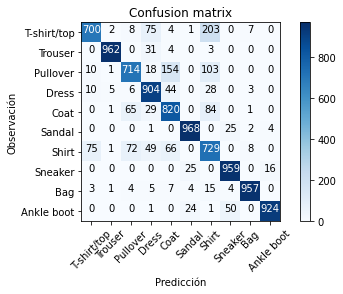

In [ ]:
# Forma necesaria de los labels para la matriz de confusión
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Funcion para representar la matriz de confusión 
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Observación')
    plt.xlabel('Predicción')

# Importamos librerias necesarias para calcular la matriz de confusión
from collections import Counter
from sklearn.metrics import confusion_matrix
import itertools

# Obtenemos las salidas del modelo para las imagenes de test
Y_pred = network9.predict(test_images)
# Obtenemos el label correspondiente a la salida del modelo
Y_pred_classes = np.argmax(Y_pred, axis = 1) 
# Obtenemos el label correspondiente a la imagen
Y_true = np.argmax(test_labels, axis = 1) 
# Generamos la matriz de confusión
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# Representamos la matriz de confusión
plot_confusion_matrix(confusion_mtx, classes = class_names)

En el caso de nuestro sistema de redes neuronales, no es verdaderamente importante la matriz de confusión ya que no hay una distinción real entre falsos positivos o falsos negativos. Esto se debe a que no partimos de una hipótesis a refutar o confirmar.

Cabe destacar que el modelo se comporta de muy buena manera para prendas de ropa diferentes casi no teniendo ningun error. Sin embargo, para prendas de ropa mas parecidas como camisetas y camisas si tiene más problemas. Estos problemas son bidireccionales ya que se puede observar que la matriz está bastante cerca de ser simétrica.



# 8. Conclusiones


Tras el desarrollo de la práctica, hemos conseguido que nuestro modelo final tenga una precisión del 87% y una pérdida de 0.36.

Para ello, hemos tenido que realizar varios cambios y que observar el comportamiento de todos nuestros modelos anteriores.

En primer lugar, hemos construido 8 modelos y dos variaciones. Esto nos ha servido para ver la importancia del número de épocas (*epoch*), ya que al aumentar de 5 a 25 épocas, ha habido sobreentrenamiento. Como habíamos visto en clase, en varias ocasiones entrenar de más a nuestra red neuronal puede ser perjudicial.

Hemos aprendido a interpretar correctamente los valores de la función *summary()*, y a ver de manera práctica cómo funcionan las diferentes capas de las neuronas de nuestra red neuronal.

Como ya esperábamos, nuestros modelos han bajado la precisión al enfrentarlos con las imagenes de test, equivocándose sobretodo en prendas similares, como ya hemos analizado anteriormente.

El haber tenido que graficar los resultados de nuestros modelos, nos ha permitido apreciar de manera visual las cifras que estábamos obteniendo anteriormente, a pesar de que 10 imágenes no sean suficientes para ver el rendimiento de nuestros modelos.

Finalmente, el haber mejorado el modelo nos ha permitido aprender sobre la función de optimización *adam* y la función de pérdida *sparse_categorical_crossentropy*, además de obtener unos resultados y valores de precisión y pérdida mejores.

---

Para llevar a cabo estre proyecto, hemos trabajado de manera conjunta. La comunicación ha sido muy fluida, lo que nos ha permitido poder dividirnos el trabajo y aún así poder participar ambos en todas sus partes.

Principalmente, Andrés Boullosa ha desarrollado el código, mientras que Cristina Velasco se ha centrado más en la memoria. 

Ambos nos hemos involucrado en las dos cosas, y ambos hemos realizado trabajo de investigación sobre los distintos temas requeridos (desde funciones específicas para el código hasta la correcta utilización de Markdown para una presentación adecuada), y ambos hemos revisado y entendido todas las partes, corrigiendo errores y realizando mejoras.

## Bibliografía


Además del [manual de Markdown](https://colab.research.google.com/notebooks/markdown_guide.ipynb) sugerido y los apuntes, documentos... etc. vistos en clase, hemos consultado las siguientes páginas webs:



1.   Brownlee, J. (11/09/2019). *How to Visualize a Deep Learning Neural Network Model in Keras*. Recuperado de https://machinelearningmastery.com/visualize-deep-learning-neural-network-model-keras/ 
2.   Brownlee, J. (13/01/2021). *Gentle Introduction to the Adam Optimization Algorithm for Deep Learning*. Recuperado de https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/ 
3.   Chris. (06/10/2019). *How to use sparse categorical crossentropy with TensorFlow 2 and Keras?* Recuperado de https://www.machinecurve.com/index.php/2019/10/06/how-to-use-sparse-categorical-crossentropy-in-keras/#sparse-categorical-crossentropy  
4.   Eni. (). *Funciones de pérdida (Loss function)*. Recuperado de https://www.ediciones-eni.com/open/mediabook.aspx?idR=8dd2ca32769cb24b49648b15ef8e777e
5.   Keras. (). *Flatten Layer*. Recuperado de https://keras.io/api/layers/reshaping_layers/flatten/ 